# Author : Babli Dey

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

## Question 1. (8 pts) 
The Bureau of Transportation Statistics (BTS) conducted a study to evaluate the impact of Sept 11 attacks (9/11) on U.S. air transportation. The purpose of this study is to provide a greater understanding of the passenger travel behavior patterns of persons travelling by air before and after the event. In order to assess the impact of September 11, BTS took the following approach: Using data before September 11, it forecasted future data (under the assumption of no terrorist attack). Then, BTS compared the forecasted series with the actual data to assess the impact of the event. 

The data is available in the file: BTS_Air_Rail_Vehicle_Miles.csv. 


In [43]:
bts_df = pd.read_csv('BTS_Air_Rail_vehicle_Miles.csv')
bts_df.head(5)

,Month,Air,Rail,Vehicle
0,Jan-90,35153577,454115779,163.28
1,Feb-90,32965187,435086002,153.25
2,Mar-90,39993913,568289732,178.42
3,Apr-90,37981886,568101697,178.68
4,May-90,38419672,539628385,188.88


### a)	Is the goal of this study descriptive or predictive ?

The Goal of the study is Descriptive.
The resons being, BTS is trying to understand the impact of 9/11 attack on the US air transportation, and in order to do so they are by understanding the behaviour of passangers befor and after the tragic incident which is not a definition of prediction but of descriptive analysis.

### b)	Create a time series plot of the Air data, i.e. a plot yt versus t, where t=1,2,3 … What would t=1, 2, 3 refer to in the time series? Which time period does t=1 refer to ? 

<u>Answers:</u>
* The t = 1,2,3 refers to the time interval when the data was captured, in this case it is the respective month and year and the time interval is monthly.
* The time t = 1, refers to the very first time point in the dataset i.e start date of the dataset. In this case for the air data, it is January, 1990.  

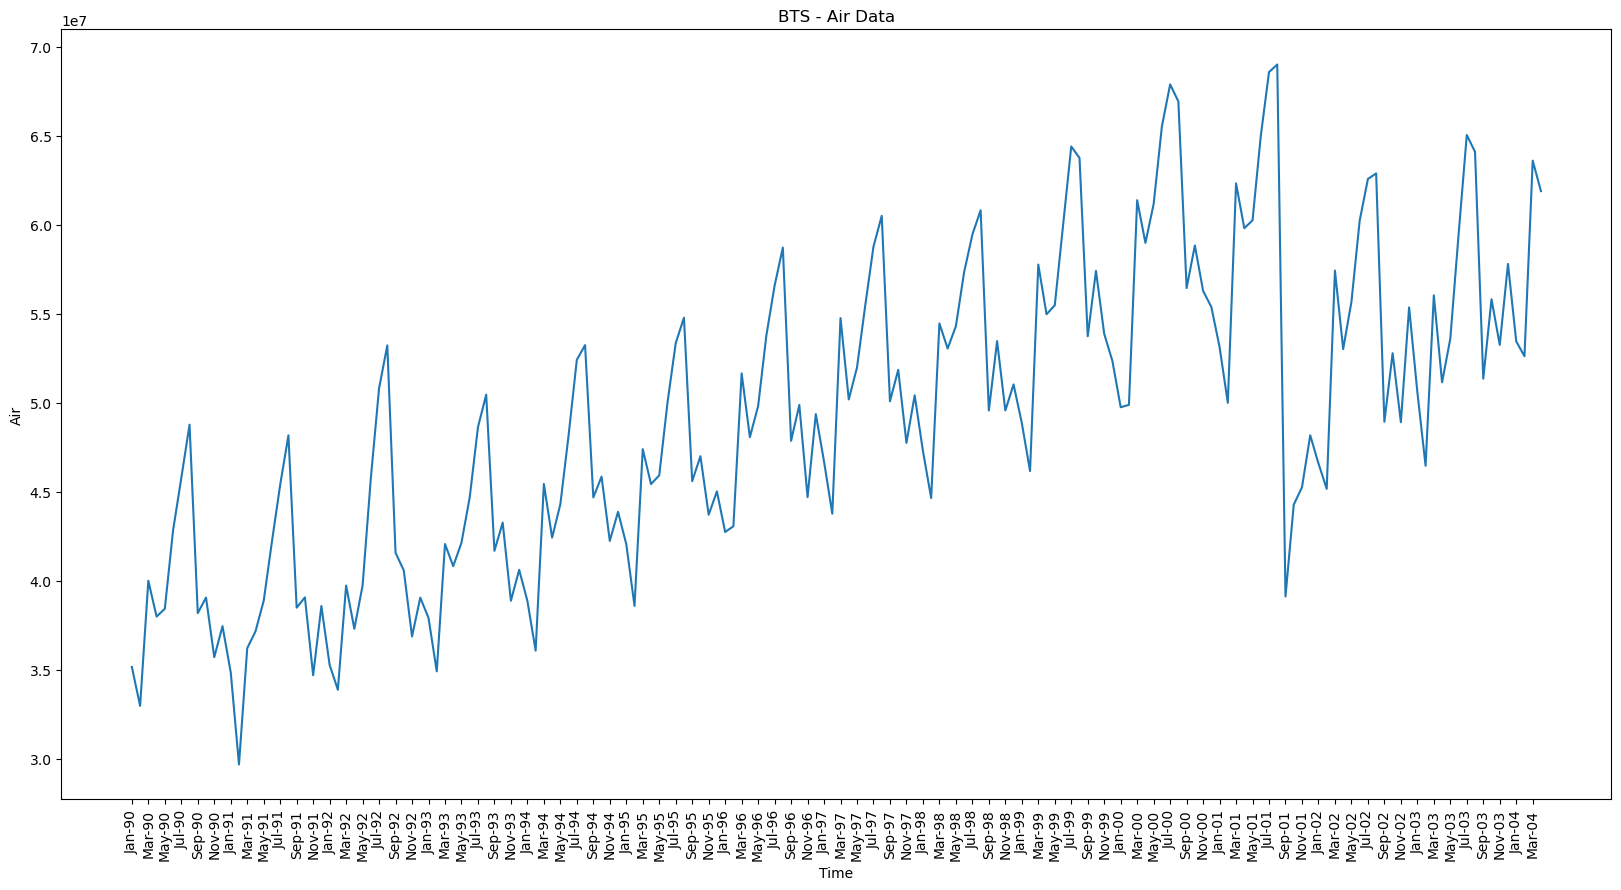

In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(data=bts_df, x = "Month", y = "Air ")
plt.xlabel('Time')
plt.ylabel('Air',)
plt.xticks(rotation=90)
plt.xticks(bts_df['Month'][::2])
plt.title('BTS - Air Data')
plt.show()

### c)	What are the values for y1, y­2 and y3 in the time series?

<u>Answer:</u>
The value of 
y1 = 35153577,
y2 = 32965187,
y3 = 39993913

In [45]:
bts_df[['Month','Air ']].head(3)

,Month,Air
0,Jan-90,35153577
1,Feb-90,32965187
2,Mar-90,39993913


## Question 2. 
In addition to air travel data, additional time series are also provided in the same data file in Question 1.
Which of these components appear in the Vehicle time series: i) Seasonality; ii) Trend; iii) Noise.

<u>Answer:</u>
The vehicle time series exhibits both seasonality (due to the distinct recurring pattern) and a trend (due to the overall upward movement over time).


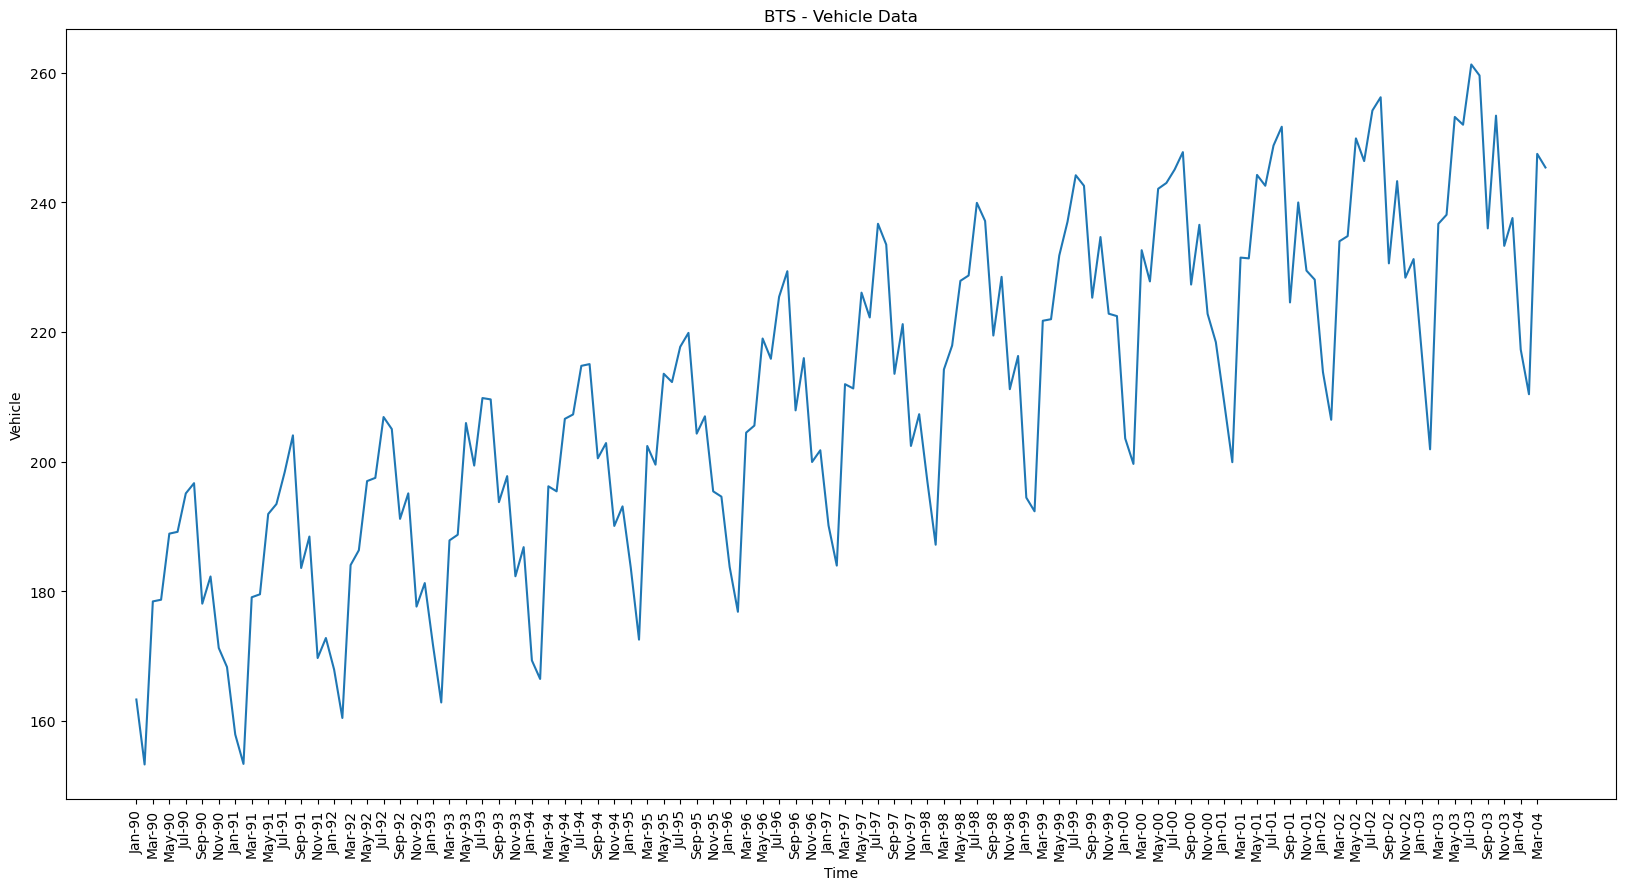

In [46]:
plt.figure(figsize=(20,10))
sns.lineplot(data=bts_df, x = "Month", y = "Vehicle")
plt.xlabel('Time')
plt.ylabel('Vehicle',)
plt.xticks(rotation=90)
plt.title('BTS - Vehicle Data')
plt.xticks(bts_df['Month'][::2])
plt.show()

## Question 3
Forecasting Shampoo Sales: The file ShampooSales.csv contains data on the monthly sales of a certain shampoo over a 3 year period. 
Which of the components (trend, seasonality, noise) are present in this series?

<u>Answer:</u>
In this Series, 
* there is strong presence of trend in this case it is trending upwards. 
* very little presence of seasonality - around the month of october-november, but it is very unclear hence very weak and not evident. 
* there appears to be noise - as there is presence of irregular spikes and drops which I would interprete it as noise.


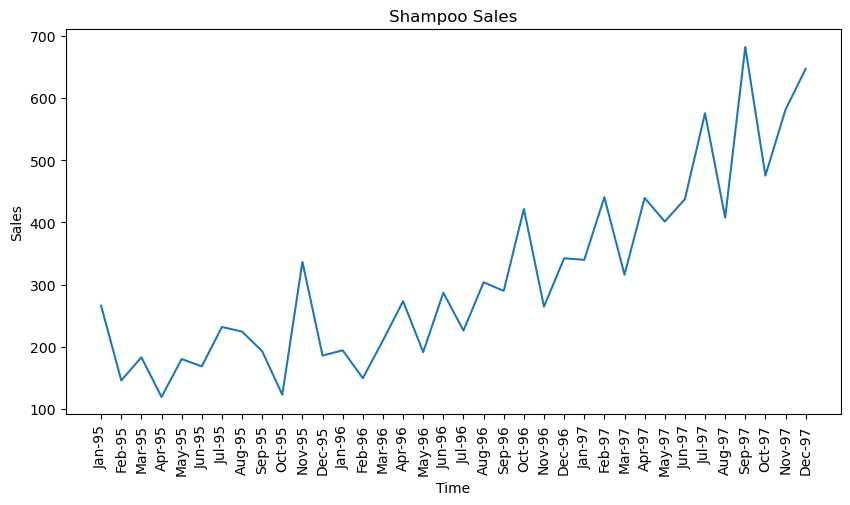

In [47]:
sales_df = pd.read_csv('ShampooSales.csv')

plt.figure(figsize=(10,5))
sns.lineplot(data=sales_df, x = "Month", y = "Shampoo Sales")
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.title('Shampoo Sales')
plt.show()

## Question 4

The file, AirSensorData.xlsx, contains the air quality data from multiple sensors. There are a total of 13 columns that contain the sensor data with the sensor name indicated at the top of the column. Answer the following questions


In [48]:
sensor_df = pd.read_excel('AirSensorData.xlsx')
sensor_df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2014-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2014-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2014-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2014-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2014-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [49]:
sensor_df['Date'] = sensor_df['Date'].astype(str)
sensor_df['Time'] = sensor_df['Time'].astype(str)
ts = pd.to_datetime(sensor_df['Date'] + ' ' + sensor_df['Time'])
ts=ts.dt.strftime("%Y-%m-%d %H:%M:%S")
sensor_df.insert(2,'time_stamp',ts)
sdf=sensor_df.iloc[:200,2:13]

### a)	(4 pts) Create a time-series plot of the first 10 sensors (i.e. 10 columns) by plotting the first 200 points in the data.

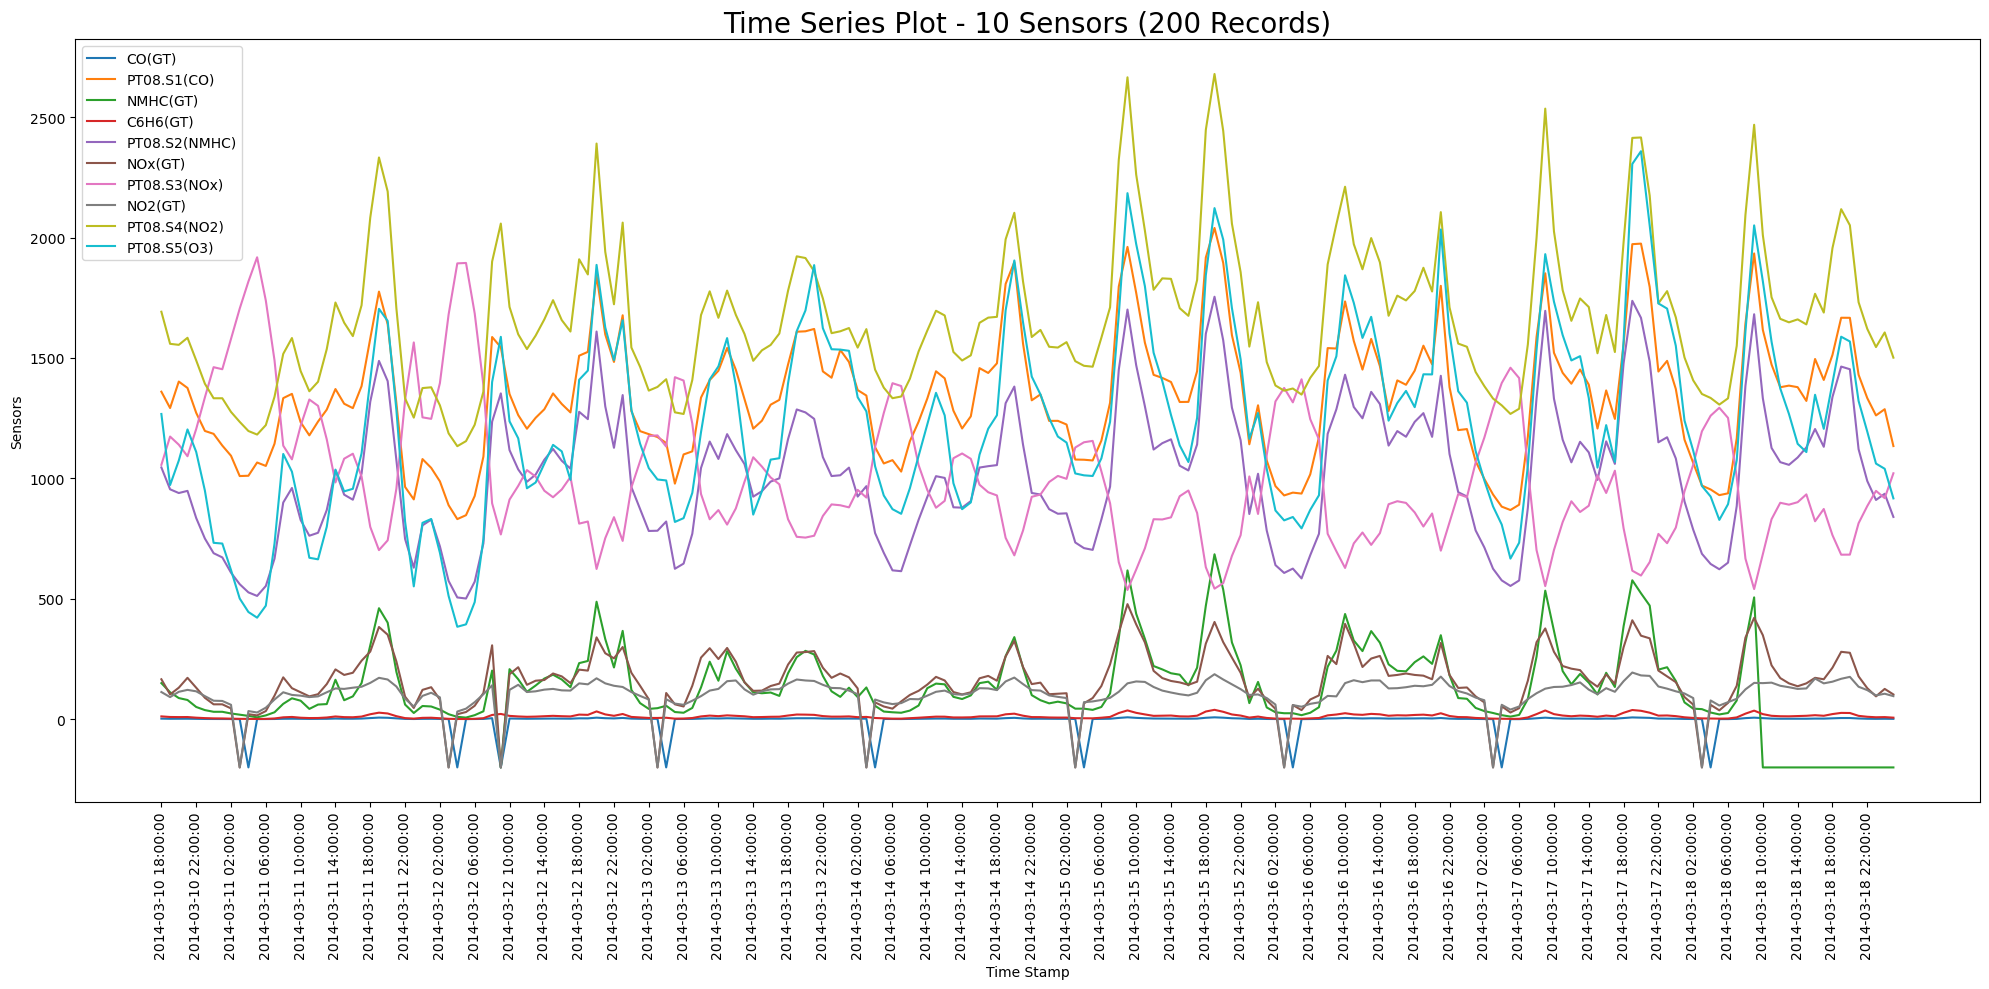

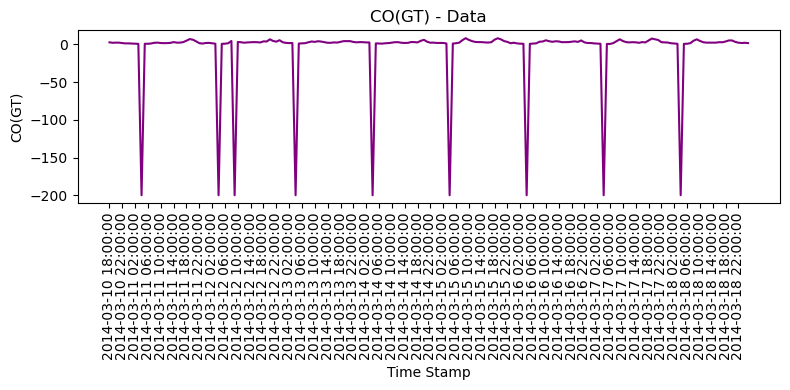

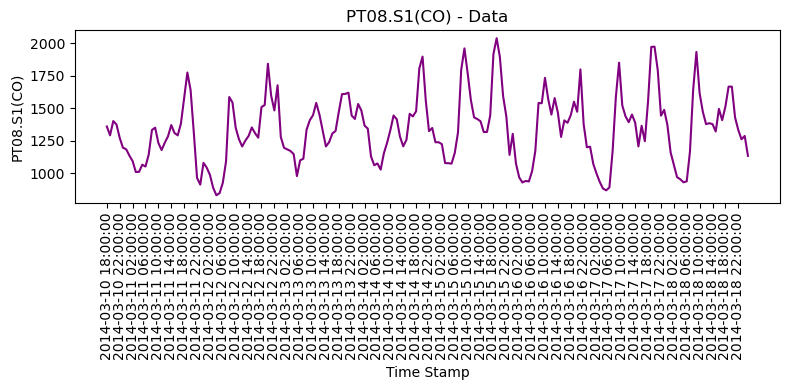

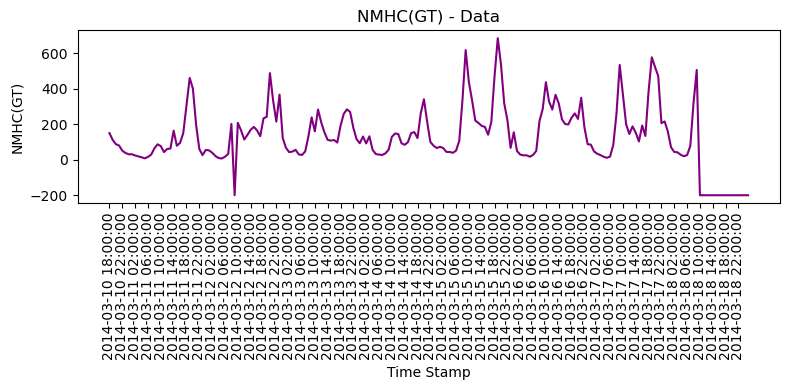

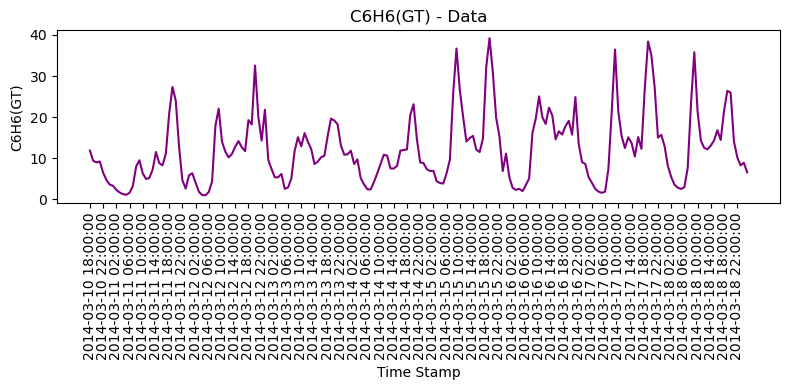

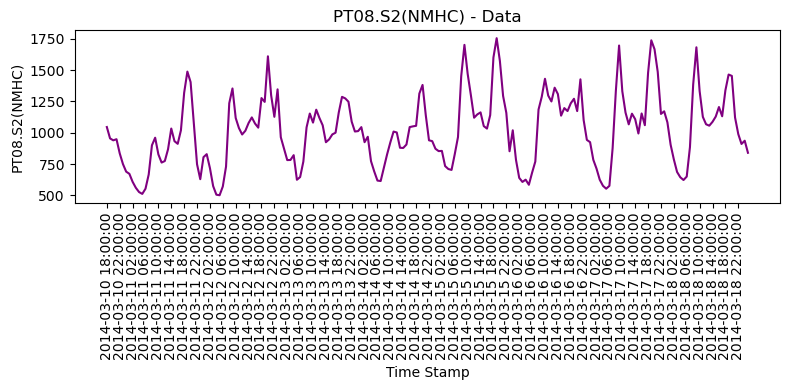

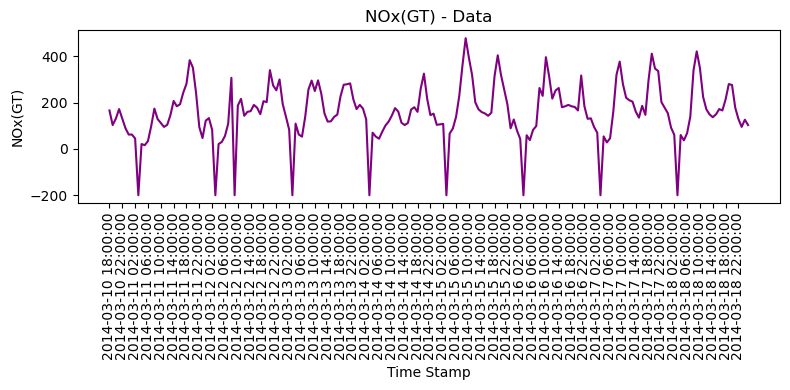

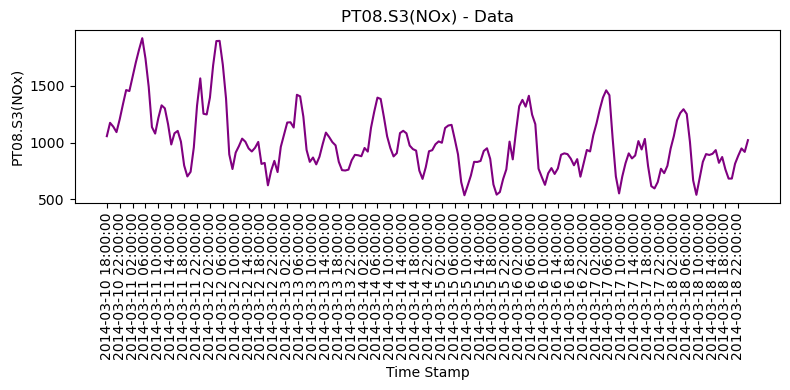

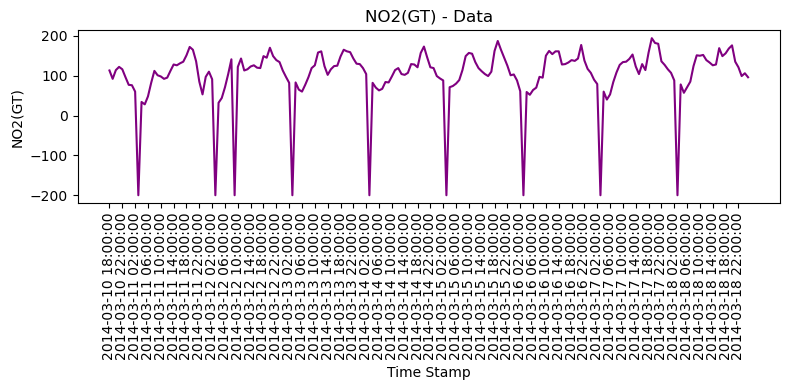

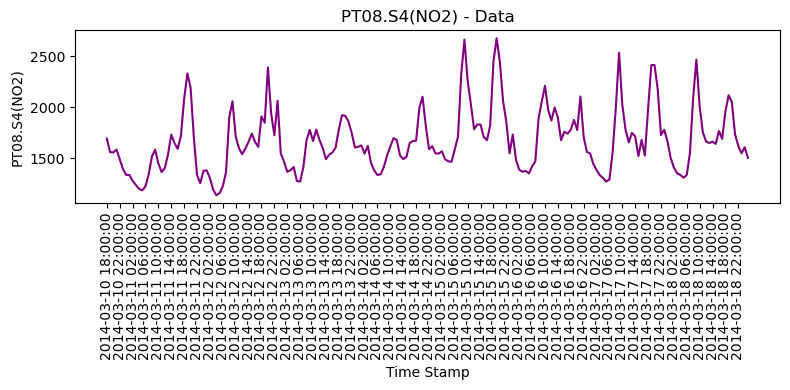

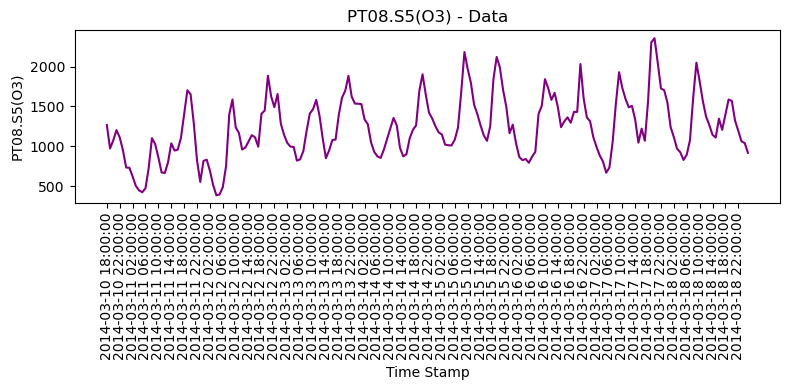

In [50]:
#Summary Plot
plt.figure(figsize=(20,10))
for column in sdf.columns[1:]:
    sns.lineplot(x='time_stamp', y=column, data=sdf, label = column)

plt.title('Time Series Plot - 10 Sensors (200 Records)',fontsize=20)
plt.xlabel('Time Stamp')
plt.ylabel('Sensors')
plt.xticks(rotation=90)
plt.xticks(sdf['time_stamp'][::4])
plt.tight_layout()
plt.show()

# Individual Time-Series Plot for Sensors
for sensor in sdf.columns[1:]:  
    plt.figure(figsize=(8, 4))  
    sns.lineplot(x='time_stamp', y=sensor, data=sdf, color = 'purple')
    plt.xlabel('Time Stamp')
    plt.ylabel(sensor)
    plt.title(f'{sensor} - Data')
    plt.xticks(rotation=90)
    plt.xticks(sdf['time_stamp'][::4])
    plt.tight_layout()
    plt.show()

### b)	(6 pts) From the plot, you should observe there are erroneous values of “-200” at random. For each of the 13 channels, determine how many such erroneous values are present in the entire dataset? Report your results via a table with 2 columns where the first column contains the sensor name and the second column is the count of the erroneous values for that sensor.  

In [51]:
error_counts = {}
for sensor in sensor_df.columns[3:]:  
    count = (sensor_df[sensor] == -200).sum()
    error_counts[sensor] = count

error_df = pd.DataFrame(list(error_counts.items()), columns=['Sensor Name', 'Erroneous Count'])

print(error_df)

      Sensor Name  Erroneous Count
0          CO(GT)             1683
1     PT08.S1(CO)              366
2        NMHC(GT)             8443
3        C6H6(GT)              366
4   PT08.S2(NMHC)              366
5         NOx(GT)             1639
6    PT08.S3(NOx)              366
7         NO2(GT)             1642
8    PT08.S4(NO2)              366
9     PT08.S5(O3)              366
10              T              366
11             RH              366
12             AH              366


### c)	(5 pts) For the time period from 3/11/2014 0:00 hrs to 3/31/2014 23:00:00 hrs (both included), plot the time series for the sensor column C6H6(GT) consisting of daily average values. Report the maximum and minimum daily average value. 

In [52]:
sensor_filter_df = sensor_df[(sensor_df['Date'] >= '2014-03-11') & (sensor_df['Date'] <= '2014-03-31') & 
          (sensor_df['Time'] >= '00:00:00') & (sensor_df['Time'] <= '23:00:00')]
sensor_filter_df=sensor_filter_df[['Date','Time','C6H6(GT)']]

avg_c6h6_data = sensor_filter_df.groupby(['Date']).agg({
    'C6H6(GT)': ['min', 'max','mean']
})

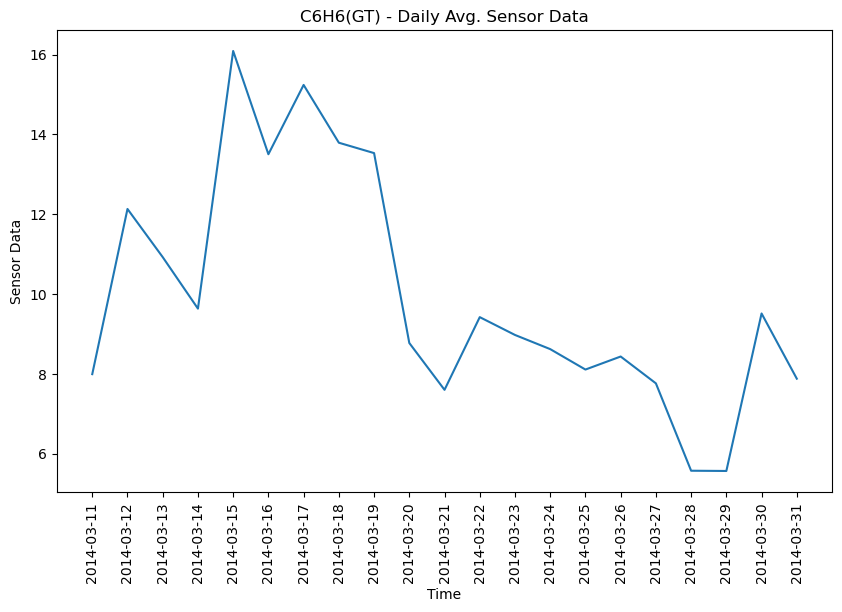

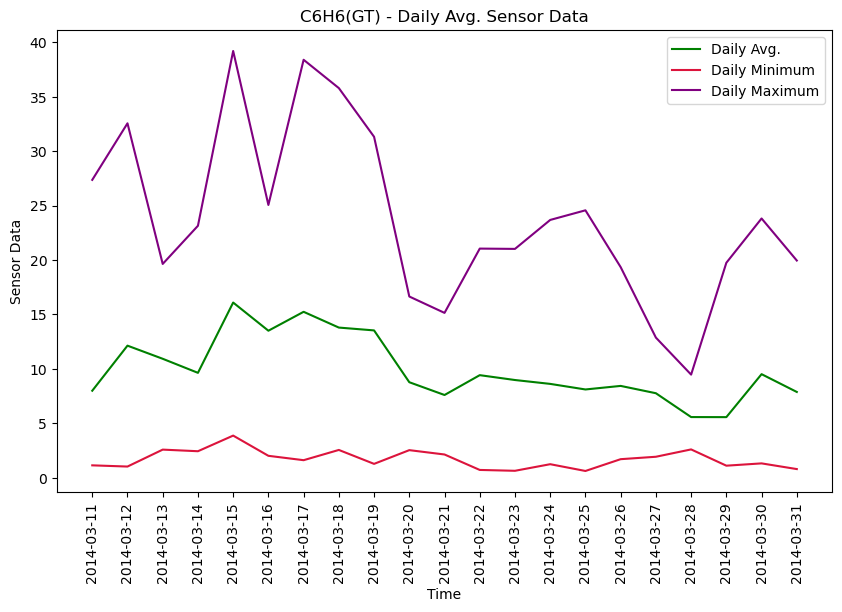

Min-Max Daily Average Value: 
            C6H6(GT)                      
                 min        max       mean
Date                                      
2014-03-11  1.133431  27.359807   7.989058
2014-03-12  1.022415  32.556278  12.129509
2014-03-13  2.577932  19.636785  10.922887
2014-03-14  2.429984  23.142126   9.631442
2014-03-15  3.865914  39.202340  16.089946
2014-03-16  2.008743  25.055150  13.501465
2014-03-17  1.606828  38.393246  15.238700
2014-03-18  2.548045  35.790571  13.790168
2014-03-19  1.268602  31.318823  13.530101
2014-03-20  2.529441  16.644390   8.769989
2014-03-21  2.130370  15.140161   7.595973
2014-03-22  0.710518  21.046116   9.418329
2014-03-23  0.632453  21.018622   8.971692
2014-03-24  1.238308  23.679335   8.616583
2014-03-25  0.616085  24.563484   8.104401
2014-03-26  1.699793  19.344006   8.431100
2014-03-27  1.922007  12.868432   7.758428
2014-03-28  2.596687   9.468788   5.568372
2014-03-29  1.101959  19.743714   5.562206
2014-03-30  1.313222  23

In [53]:
plt.figure(figsize=(10,6))
sns.lineplot(avg_c6h6_data, x = 'Date', y = ('C6H6(GT)', 'mean'))
plt.xlabel('Time')
plt.ylabel('Sensor Data')
plt.xticks(rotation=90)
plt.title('C6H6(GT) - Daily Avg. Sensor Data')

plt.figure(figsize=(10,6))
sns.lineplot(avg_c6h6_data, x = 'Date', y = ('C6H6(GT)', 'mean'), color = 'green',label = 'Daily Avg.')
sns.lineplot(avg_c6h6_data, x = 'Date', y = ('C6H6(GT)', 'min'),color = 'crimson', label = 'Daily Minimum')
sns.lineplot(avg_c6h6_data, x = 'Date', y = ('C6H6(GT)', 'max') , color = 'purple', label = 'Daily Maximum')
plt.xlabel('Time')
plt.ylabel('Sensor Data')
plt.xticks(rotation=90)
plt.title('C6H6(GT) - Daily Avg. Sensor Data')
plt.show()

print(f"Min-Max Daily Average Value: \n{avg_c6h6_data}")

## Question 5
The file, Beverages_Shipment_2020.csv, contains the US beverage product shipments data. 

In [54]:
beverageShip_df = pd.read_csv('Beverages_Shipment_2020.csv')
beverageShip_df.head(5)

,Month,Dollars (in Millions)
0,Jan-92,3519
1,Feb-92,3803
2,Mar-92,4332
3,Apr-92,4251
4,May-92,4661


### a)	Is there seasonality in this time series?	

<u>Answer:</u>
There is clear seasonality in the beverage shipment data, as indicated by the regular, distinct repeating pattern.

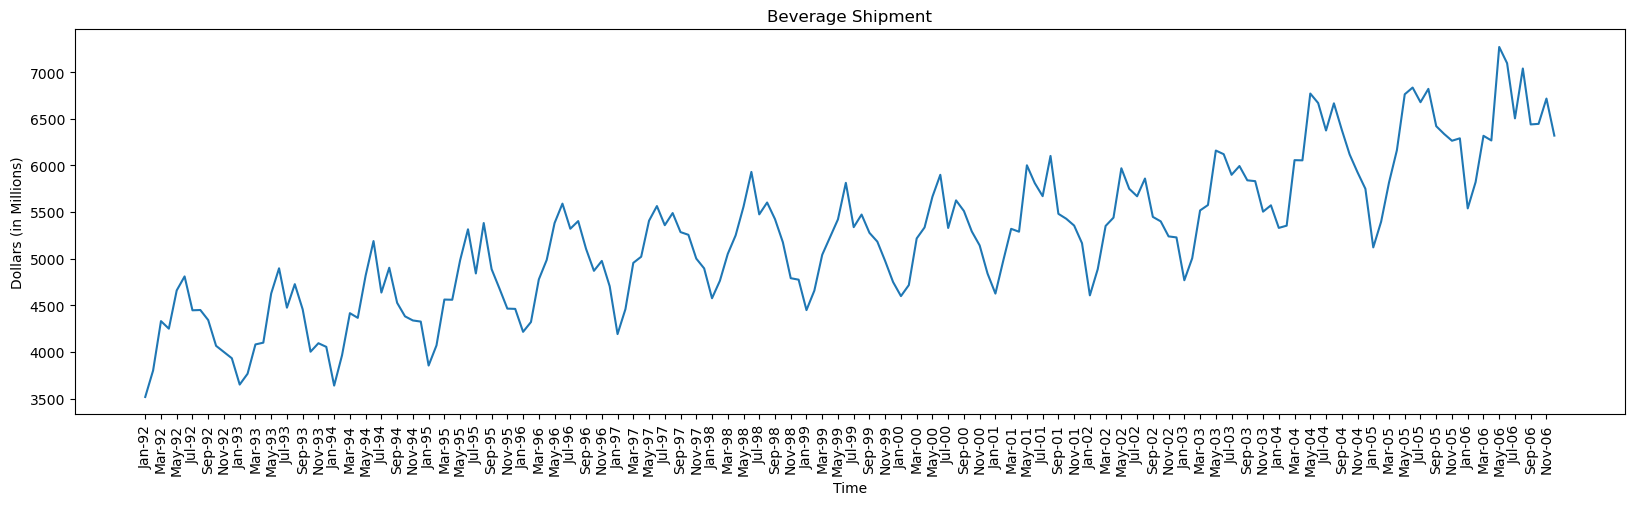

In [55]:
plt.figure(figsize=(20,5))
sns.lineplot(data=beverageShip_df, x = "Month", y = "Dollars (in Millions)")
plt.xlabel('Time')
plt.ylabel('Dollars (in Millions)')
plt.xticks(rotation=90)
plt.xticks(beverageShip_df['Month'][::2])
plt.title('Beverage Shipment')
plt.show()

### b)	Find the sample autocorrelation function for this data set. 			(2 pts)
(For Python, you can use the “plot_acf” function in “statmodels” module. Plot at least 25 lags)


In [56]:
beverageShip_df['Month']=pd.to_datetime(beverageShip_df['Month'], format='%b-%y')
beverageShip_df.set_index('Month',inplace=True)

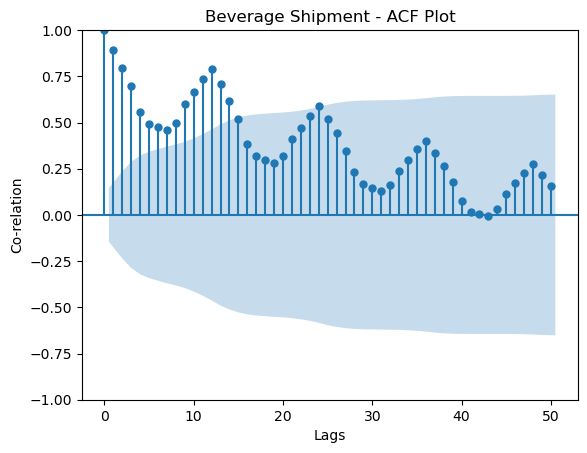

In [57]:
plot_acf(beverageShip_df['Dollars (in Millions)'], lags=50) # the lag I have choosen is 50
plt.title('Beverage Shipment - ACF Plot')
plt.ylabel('Co-relation')
plt.xlabel('Lags')
plt.show()

### c)	From the autocorrelation plot in (b), what is the seasonal period (state the units)? Explain your answer.     (2 pts)

<u>Answer:</u>

Since the data refers to monthly beverage shipments, each lag in the autocorrelation plot represents one month. From the ACF plot, the seasonal period can be estimated by identifying the regular intervals at which peaks occur.

The ACF plot shows peaks approximately at:

* A little over lag 10,
* Slightly before lag 20,
* Slightly after the middle between lags 20 and 30,
* Slightly more than halfway between lags 30 and 40,
* Finally, a peak closer to lag 50.

This pattern indicates that the ACF plot peaks at intervals of approximately 12 lags (12 months), meaning the data exhibits a seasonal period of about 12 (units) months.

Thus, the beverage shipment data likely follows a yearly seasonal cycle, with shipments repeating a similar pattern every 12 months.

## Question 6

Data on US coal production is given in Coal_Production_US_2020.csv. 

In [58]:
coal_df = pd.read_csv('Coal_Production_US_2020.csv')
coal_df.head(5)

,Year,"Coal Production, Short Tons in Thousands"
0,1949,480570
1,1950,560388
2,1951,576335
3,1952,507424
4,1953,488239


### a)	Plot the coal production data and the sample autocorrelation function. 

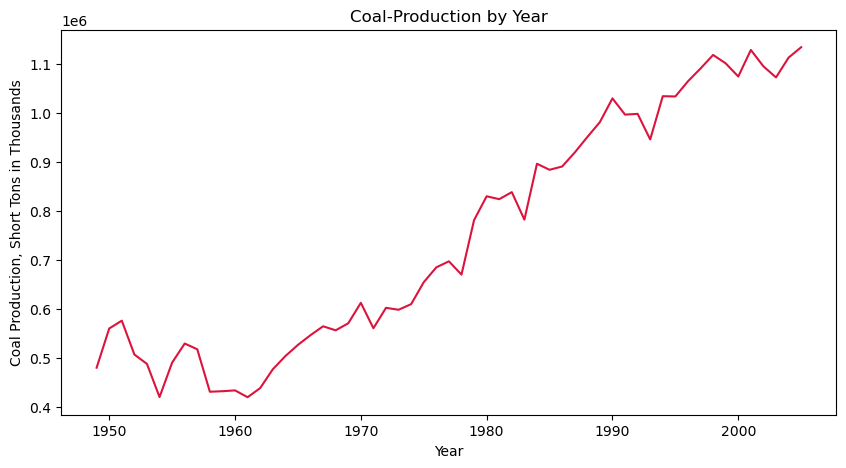

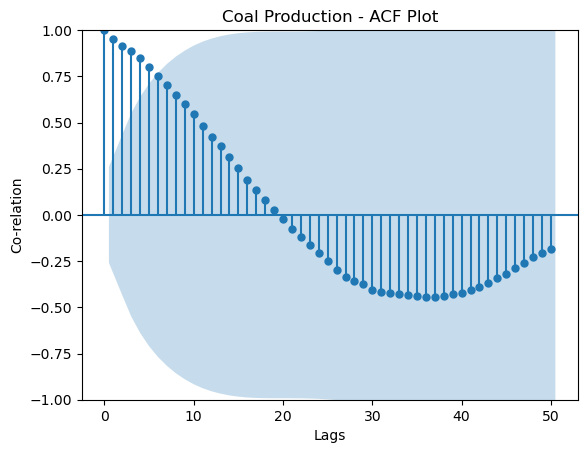

In [59]:
# Time Series plot for coal production data
plt.figure(figsize=(10,5))
sns.lineplot(data=coal_df,x='Year',y='Coal Production, Short Tons in Thousands',color = 'crimson')
plt.title('Coal-Production by Year')
plt.xlabel('Year')
plt.ylabel('Coal Production, Short Tons in Thousands')

# Sample Auto-Corelation Plot
plot_acf(coal_df['Coal Production, Short Tons in Thousands'], lags=50)
plt.title('Coal Production - ACF Plot')
plt.xlabel('Lags')
plt.ylabel('Co-relation')

plt.show()

### b)	Is the time series stationary or non-stationary? 

<u>Answer:</u>

The time series is non-stationary, because the time series exhibits trend over time which is a characterstic of non-stationary data, which means the mean is changing over time rather than staying constant. The ACF plot confirms that the coal production data is non-stationary due to the slow decay of autocorrelations and the presence of a long-term trend.

### c)	Plot the first difference of the time series and the sample autocorrelation function of the first difference. 	

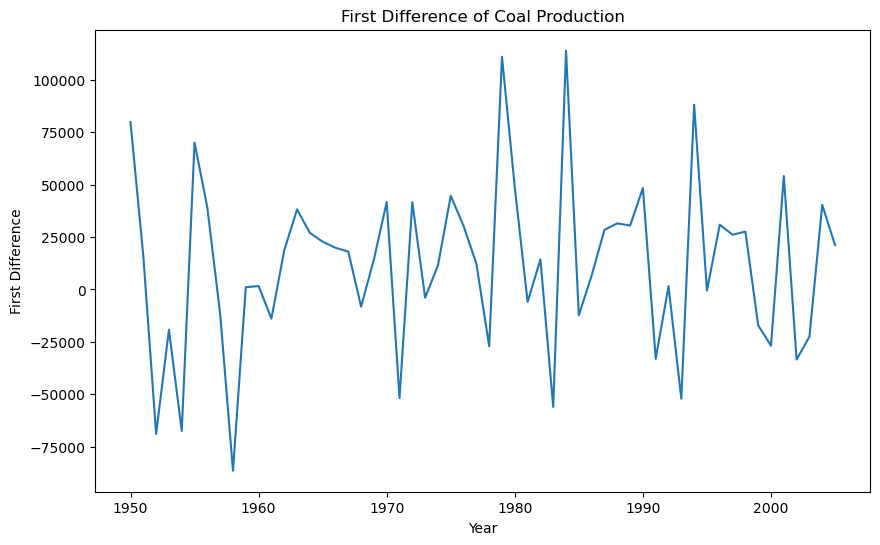

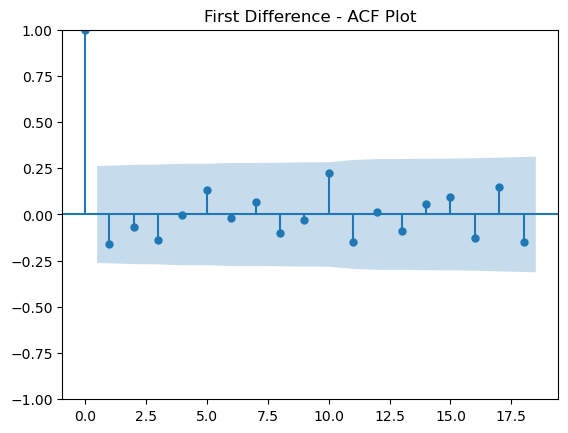

In [60]:
# First difference
coal_df['first_diff'] = coal_df['Coal Production, Short Tons in Thousands'].diff()

# Plot the first difference
plt.figure(figsize=(10, 6))
plt.plot(coal_df['Year'], coal_df['first_diff'])
plt.title('First Difference of Coal Production')
plt.xlabel('Year')
plt.ylabel('First Difference')
plt.show()

# Plot the ACF of the differenced data
plot_acf(coal_df['first_diff'].dropna())
plt.title('First Difference - ACF Plot')
plt.show()


### d)	What impact has differencing had on the time series? Comment with respect to presence or absence of stationarity	

1. Impact of Differencing on the Time Series Plot:
* Before Differencing - The original time series showed a clear upward trend, as seen in the graph **Coal Production by Year** and with strong positive autocorelation in the ACF plot **Coal Production - ACF Plot**. This confirmed that the time series was non-stationary before differencing. 

* After Differencing - Once differencing was applied, the trend was removed, as evidenced by the **First Difference of Coal Production** time series plot. The series now fluctuates around zero, with no clear trend, which suggests that differencing has successfully made the series more stationary.

2. ACF Plots after Differencing - The ACF plot after differencing shows that most of the autocorrelations are now within the confidence intervals, and they drop off rapidly after lag 1. This is characteristic of a stationary time series, where the autocorrelations are minimal and do not persist over many lags.

To summarize, comparing the graphs from before and after differencing we can clearly see that applying First difference to this particular time series has removed the upward trend component and made the time series more stationary.

